## Data cleaning

Rows dropped
- We have dropped all the data for businesses that are not restaurants. This is because we wanted to narrow down our analysis and have consistency across all the rows which we would analyze. Since yelp ratings are also a fundamental part of our analysis, we verified that there were no Nans in that column.

- We will only look at data from Arizona, Nevada, North Carolina, and Pennsylvania for specificity. So we dropped all the rows of locations that are not in those states.


Columns dropped
- We dropped the 'type' column because the value for every point of data was 'business' so it was arbitrary to keep the data.


In [2]:
import pandas as pd
import numpy as np

In [3]:
yelp = pd.read_csv('/Users/elizabeth/downloads/Yelp/yelp.csv')

In [4]:
yelp.head()

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354116,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# dropped all the non-restaurants.
restaurants = yelp[yelp['Is_Restaurants'] == True]

In [6]:
restaurants.shape

(22264, 89)

In [7]:
# we only want rows with all the important info.
restaurants = restaurants.dropna(subset = ['state', 'city', 'name'], how = 'any')
restaurants = restaurants.drop(['type'], axis = 1)
restaurants.shape

(22263, 88)

## Basic visualizations 

In [8]:
import math
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
restaurants.head()

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,Sunday_Open,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,NaN,...,0,0,0,0,0,0,0,0,0,0
5,mVHrayjG3uZ_RLHkLj-AMg,rankin,"414 Hawkins Ave rankin, PA 15104",40.413464,-79.880247,Emil's Lounge,20,5.0,PA,NaN,...,0,0,0,0,0,0,0,23,1,1
7,KayYbHCt-RkbGcPdGOThNg,Carnegie,"141 Hawthorne St Greentree Carnegie, PA 15106",40.415517,-80.067534,Alexion's Bar & Grill,21,4.0,PA,NaN,...,0,0,0,0,0,0,0,55,2,0
14,wJr6kSA5dchdgOdwH6dZ2w,Carnegie,"2100 Washington Pike Carnegie, PA 15106",40.387512,-80.093215,Kings Family Restaurant,8,3.5,PA,08:00,...,0,0,0,0,0,0,0,15,1,0
18,fNGIbpazjTRdXgwRY_NIXA,Carnegie,"1201 Washington Ave Carnegie, PA 15106",40.396469,-80.084942,Rocky's Lounge,7,4.0,PA,NaN,...,0,0,0,0,0,0,0,11,2,0


In [11]:
grouped_states = restaurants.groupby(['state'], as_index=False)
grouped_by_state = grouped_states.agg({'name' : 'count'})
grouped_by_state = grouped_by_state.rename(columns = {'name' : 'count'})
grouped_by_state.sort_values(['count'], ascending = False)

,state,count
0,AZ,8857
10,NV,5518
8,NC,2239
13,PA,1549
2,EDH,1155
18,WI,1103
14,QC,611
1,BW,395
12,ON,323
5,IL,299


In [12]:
# separating all the data from AZ, NV, NC, and PA from the rest.
restaurants = restaurants[np.logical_or(restaurants['state'] == 'AZ',
                            np.logical_or(restaurants['state'] == 'NV',
                                         np.logical_or(restaurants['state'] == 'NC', restaurants['state'] == 'PA')))]

In [13]:
state_group = restaurants.groupby('state', as_index = False)
rest_count = state_group.agg({'name' : 'count'})
rest_by_state = rest_count.rename(columns = {'name' : 'count'})
rest_by_state

,state,count
0,AZ,8857
1,NC,2239
2,NV,5518
3,PA,1549


Text(0.5,1,'Number of Restaurants per State')

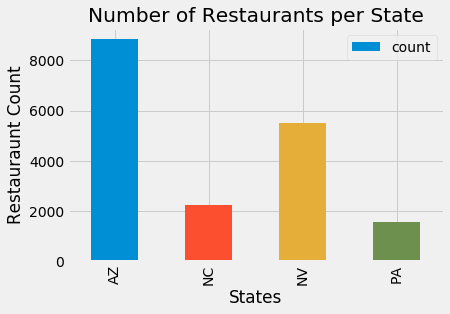

In [14]:
plt.style.use('fivethirtyeight')
rest_by_state.plot.bar(x = 'state', y = 'count')
plt.xlabel('States')
plt.ylabel('Restauraunt Count')
plt.title('Number of Restaurants per State')


In [15]:
az_rest = restaurants[restaurants['state'] == 'AZ']
nc_rest = restaurants[restaurants['state'] == 'NC']
pa_rest = restaurants[restaurants['state'] == 'PA']
nv_rest = restaurants[restaurants['state'] == 'NV']

In [16]:
azgroup= restaurants.groupby('city', as_index = False)
az_rest_count = azgroup.agg({'name' : 'count'})
az_rest_by_city = az_rest_count.rename(columns = {'name' : 'count'})

#### cities that had too few restaurants were eliminated to narrow down the data 

In [17]:
az_select = az_rest_by_city[az_rest_by_city['count'] > 10]

In [18]:
az_cities = np.array(az_select['city']).tolist()

Text(0.5,1,'Number of Restaurants per city in Arizona')

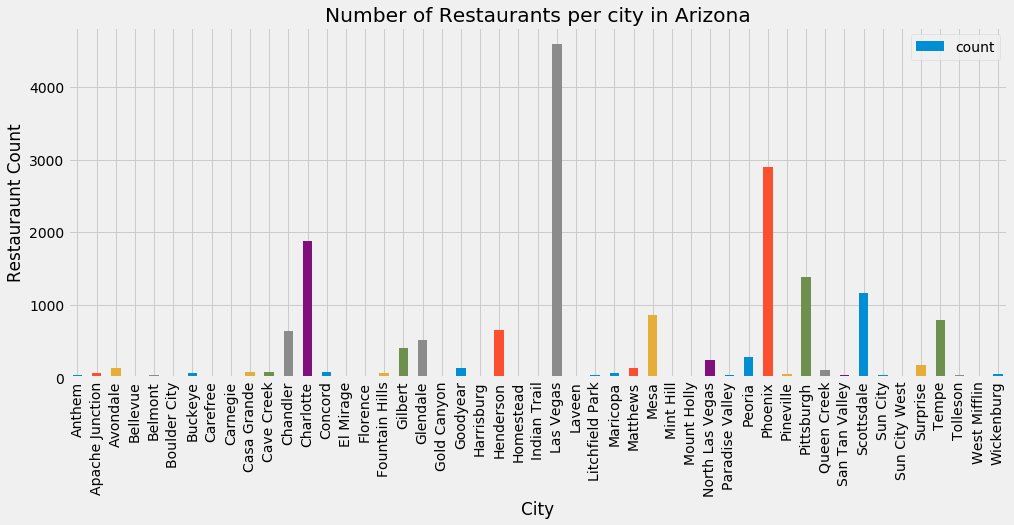

In [19]:
az_select.plot.bar(x = 'city', y = 'count', figsize = (15,6))
plt.xlabel('City')
plt.ylabel('Restauraunt Count')
plt.title('Number of Restaurants per city in Arizona')

# @Nicole's original line:
# plt.xticks(np.arange(0,49,2))
# I just changed the step size so we could get all the cities and not just every other.
#plt.xticks(np.arange(0,49,1))


In [20]:
# graphing the average rating of restaurants per city. 

In [21]:
mean_rating_city = azgroup.agg({'stars' : 'mean'})
mean_rating_city = mean_rating_city.rename(columns = {'stars' : 'average star rating'})
mean_rating_city.head()

,city,average star rating
0,Ahwatukee,3.625000
1,Allentown,4.000000
2,Anthem,3.375000
3,Apache Junction,3.146552
4,Arcadia,3.500000


In [22]:
# merging with the az_select df (which only has cities with more than 10 restaurants)
mean_rating_city = pd.merge(az_select, mean_rating_city, on = 'city', how = 'inner')

Text(0.5,1,'Avg Star Rating per city in Arizona')

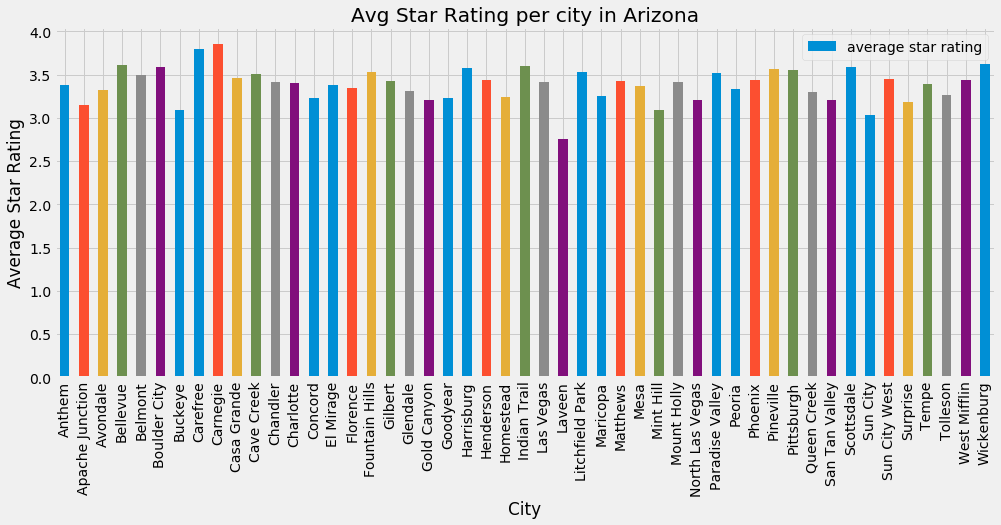

In [23]:
mean_rating_city.plot.bar(x = 'city', y = 'average star rating', figsize = (15,6))
plt.xlabel('City')
plt.ylabel('Average Star Rating')
plt.title('Avg Star Rating per city in Arizona')

# @Nicole's original line:
# plt.xticks(np.arange(0,49,2))
# I just changed the step size so we could get all the cities and not just every other.
#plt.xticks(np.arange(0,49,1))


### visualization explanation

- The number of restaurants per selected state were represented in a bar graph. This enabled us to narrow down which state we should analyze. Arizonna was then grouped by city to make sure there were a sufficient amount of cities to analyze in that data set. For future milestones, we will find demographic information on those cities, merge the data, and use that in our analysis of the data. The number of restaurants per city was then graphed. It is evident that some cities have much more restaurants than others. Other data on population could aid us in seeing why that is so. 

- The second bar graph shows the average star rating per each city. We can see that star ratings are not uniform across all cities and there is some variation.

In [24]:
az_rest.to_csv("az_restaurants.csv")

## First visualization that leads to our first hypothesis

In [25]:
# opening the arizona restaurants csv
az_rest = pd.read_csv('az_restaurants.csv')
az_rest.head()

,Unnamed: 0,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,2213,x5Mv61CnZLohZWxfCVCPTQ,Phoenix,"2819 N Central Ave Phoenix, AZ 85004",33.479482,-112.073681,Domino's Pizza,16,2.5,AZ,...,0,0,0,0,0,0,0,13,5,0
1,2214,2ZnCITVa0abGce4gZ6RhIw,Phoenix,"1850 N Central Ave Phoenix, AZ 85004",33.468547,-112.075085,Viad Tower Restaurants,6,3.5,AZ,...,0,0,0,0,0,0,0,116,1,0
2,2215,EmzaQR5hQlF0WIl24NxAZA,Phoenix,"132 E Washington St Phoenix, AZ 85004",33.448399,-112.071702,Sky Lounge,25,2.5,AZ,...,0,0,0,0,0,0,0,56,3,0
3,2219,KPoTixdjoJxSqRSEApSAGg,Phoenix,"2631 N Central Ave Phoenix, AZ 85004",33.477939,-112.073417,Wild Thaiger,432,3.5,AZ,...,0,0,0,0,0,0,0,993,108,0
4,2227,e5kc0CQ4R-PCCDgb274gSg,Phoenix,"455 N 3rd St Ste 114 Phoenix, AZ 85004",33.452154,-112.068620,Canyon Cafe,238,3.5,AZ,...,0,0,0,0,0,0,0,771,47,1


In [26]:
# we were first interested in seeing how many mexican restaurants there were per a city
az_city_grouped = az_rest.groupby(by = 'city', as_index = False)
mex_per_city = az_city_grouped.agg({'Mexican':'sum'})
mex_per_city

,city,Mexican
0,Ahwatukee,0
1,Anthem,4
2,Apache Junction,12
3,Arcadia,0
4,Arlington,0
5,Avondale,28
6,Black Canyon City,0
7,Buckeye,13
8,Carefree,1
9,Casa Grande,18


In [27]:
azgroup= az_rest.groupby('city', as_index = False)
az_rest_count = azgroup.agg({'name' : 'count'})
az_rest_by_city = az_rest_count.rename(columns = {'name' : 'count'})
total_and_mex = pd.merge(az_rest_by_city, mex_per_city)
total_and_mex['Percent Mexican Restaurant'] = total_and_mex['Mexican'] / total_and_mex['count']
total_and_mex = total_and_mex.rename(columns = {'count' : 'Total Restaurants'})
total_and_mex['Other Restaurants'] = 1 - total_and_mex['Percent Mexican Restaurant']
total_and_mex

,city,Total Restaurants,Mexican,Percent Mexican Restaurant,Other Restaurants
0,Ahwatukee,4,0,0.000000,1.000000
1,Anthem,36,4,0.111111,0.888889
2,Apache Junction,58,12,0.206897,0.793103
3,Arcadia,1,0,0.000000,1.000000
4,Arlington,1,0,0.000000,1.000000
5,Avondale,129,28,0.217054,0.782946
6,Black Canyon City,1,0,0.000000,1.000000
7,Buckeye,53,13,0.245283,0.754717
8,Carefree,20,1,0.050000,0.950000
9,Casa Grande,79,18,0.227848,0.772152


Text(0.5,1,'Proportion of Mexican Restaurants per city in Arizona')

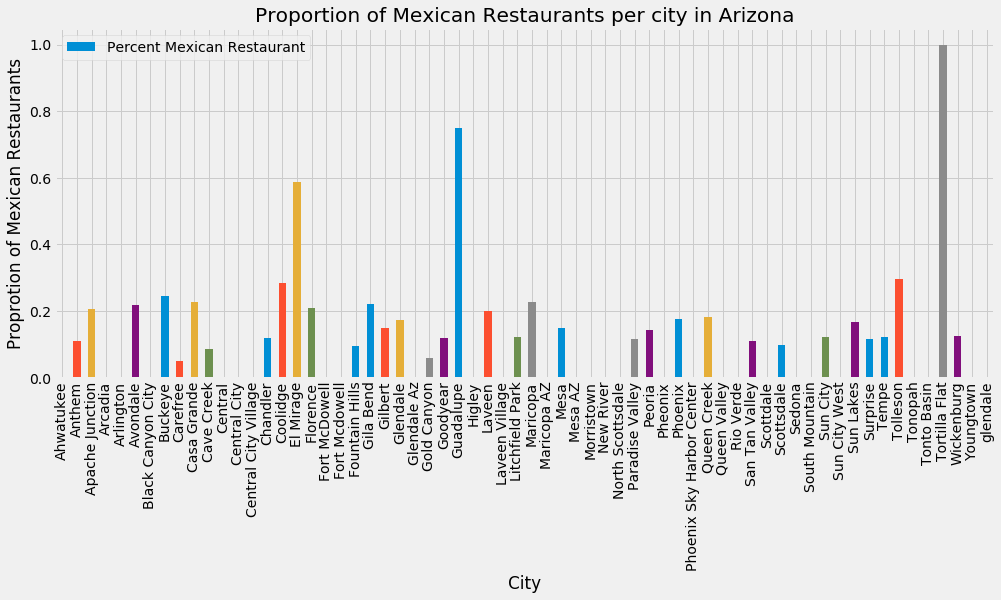

In [28]:
plt.style.use('fivethirtyeight')
total_and_mex.plot.bar(x = 'city', y = 'Percent Mexican Restaurant', figsize = (15,6))
plt.xlabel('City')
plt.ylabel('Proprotion of Mexican Restaurants')
plt.title('Proportion of Mexican Restaurants per city in Arizona')

From this, we saw that some cities had a lot more Mexican Restaurants than others. We became interested in whether this was significant. 

In order to add to our analysis, we found demographic data to pair with our restaurant data. Maybe the proportion of Mexican restaurants in a city correlates to the size of the Latinx population in a certain city. We made a regression model below to test this

In [29]:
az_demographics = pd.read_csv('az_city_demographics_cleaned.csv')
az_demographics

,City,Total population,Median age,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,...,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Mexicans,Puerto Rican,Cuban,Hispanic or Latino,In households
0,Apache Junction city,"35,840",47.5,7,19,145,28,22,33,25,...,"32,844",654,678,441,101,"4,410",130,17,"5,153","35,557"
1,Avondale city,"76,238",28.6,327,268,864,93,180,589,363,...,"47,017","8,272","1,910","3,550",574,"34,041",614,90,"38,340","76,078"
2,Benson city,"5,105",52.5,0,0,14,3,9,2,9,...,"4,648",77,116,80,15,"1,010",24,4,"1,126","5,031"
3,Bisbee city,"5,575",48.8,7,4,9,4,1,1,0,...,"4,893",110,143,55,10,"1,868",33,8,"2,019","5,333"
4,Buckeye town,"50,876",30.7,75,58,341,34,100,116,189,...,"35,259","4,272","1,321","1,346",202,"17,133",452,79,"19,489","45,782"
5,Bullhead City city,"39,540",48.2,35,63,211,69,41,28,109,...,"33,431",725,797,798,154,"8,203",161,43,"9,386","39,374"
6,Camp Verde town,"10,873",44.0,4,18,12,2,3,0,7,...,"9,270",112,"1,059",93,47,"1,445",21,9,"1,779","10,175"
7,Carefree town,"3,363",60.2,3,21,5,13,5,4,5,...,"3,254",28,26,72,1,58,7,6,98,"3,316"
8,Casa Grande city,"48,571",36.0,102,74,426,27,48,117,81,...,"34,659","2,858","3,077","1,215",198,"16,939",280,60,"18,932","48,289"
9,Cave Creek town,"5,015",51.2,5,9,6,5,3,6,7,...,"4,751",52,47,58,5,317,13,6,408,"5,015"


We wrote a function to remove the commas and make the string numbers into floats so that we can manipulate them and do calculations.

In [30]:
def remove_comma(x):
    if ',' in x:
        split_x = x.split(',')
        joined_x = ''.join(split_x)
        return float(joined_x)
        
    else:
        return float(x)

In [31]:
az_demographics['Total population'] = az_demographics['Total population'].apply(remove_comma)

In [32]:
az_demographics['Mexicans'] = az_demographics['Mexicans'].apply(remove_comma)

In [33]:
#finding the percent of mexicans in one city 
az_demographics['Percent Mexican'] = az_demographics['Mexicans'] / az_demographics['Total population']

In [34]:
#cleaning the city and town names in the data
def remove(x): 
    if 'city' in x:
        return x[:-5]
    elif 'town' in x:
        return x[:-5]

In [35]:
az_demographics['City'] = az_demographics['City'].apply(remove)

In [36]:
#now we are merging this data with the datafrme that contained the proportions of mexican restaurants
city_data = pd.merge(total_and_mex, az_demographics, left_on = 'city', right_on = 'City')
city_data

,city,Total Restaurants,Mexican,Percent Mexican Restaurant,Other Restaurants,City,Total population,Median age,Asian Indian,Chinese,...,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Mexicans,Puerto Rican,Cuban,Hispanic or Latino,In households,Percent Mexican
0,Apache Junction,58,12,0.206897,0.793103,Apache Junction,35840.0,47.5,7,19,...,654,678,441,101,4410.0,130,17,"5,153","35,557",0.123047
1,Avondale,129,28,0.217054,0.782946,Avondale,76238.0,28.6,327,268,...,"8,272","1,910","3,550",574,34041.0,614,90,"38,340","76,078",0.446510
2,Buckeye,53,13,0.245283,0.754717,Buckeye,50876.0,30.7,75,58,...,"4,272","1,321","1,346",202,17133.0,452,79,"19,489","45,782",0.336760
3,Carefree,20,1,0.050000,0.950000,Carefree,3363.0,60.2,3,21,...,28,26,72,1,58.0,7,6,98,"3,316",0.017247
4,Casa Grande,79,18,0.227848,0.772152,Casa Grande,48571.0,36.0,102,74,...,"2,858","3,077","1,215",198,16939.0,280,60,"18,932","48,289",0.348747
5,Cave Creek,69,6,0.086957,0.913043,Cave Creek,5015.0,51.2,5,9,...,52,47,58,5,317.0,13,6,408,"5,015",0.063210
6,Chandler,638,76,0.119122,0.880878,Chandler,236123.0,34.1,"5,592","4,207",...,"13,924","5,339","22,619","1,020",42911.0,"1,543",371,"51,808","235,577",0.181732
7,Coolidge,7,2,0.285714,0.714286,Coolidge,11825.0,31.0,18,20,...,"1,130",887,184,43,4191.0,65,10,"4,962","11,825",0.354419
8,El Mirage,17,10,0.588235,0.411765,El Mirage,31797.0,28.1,65,49,...,"2,589",787,859,172,13305.0,364,45,"15,120","31,784",0.418436
9,Florence,19,4,0.210526,0.789474,Florence,25536.0,36.2,65,27,...,"1,795","3,875",288,34,6998.0,190,26,"7,978","7,836",0.274044


We are also interested in seeing if the ratings for Mexican restaurants in arizona are significantly higher than restaurants in North Carolina due to the following visuals. This could potentially be influenced by Arizona's proximity to Mexico

In [37]:
az_rest_mex = az_rest[az_rest['Mexican'] == 1]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


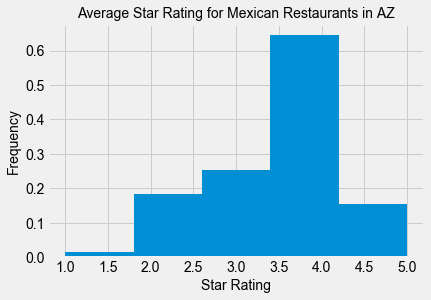

In [38]:
plt.hist(az_rest_mex['stars'], normed = 1, bins = 5)
plt.title('Average Star Rating for Mexican Restaurants in AZ', size = 'medium')
plt.xlabel('Star Rating', size = 'medium')
plt.ylabel('Frequency', size = 'medium')
plt.style.use('seaborn')

In [39]:
#booting up the North Carolina restaurant dataframe
nc_rest = pd.read_csv('ncrest.csv')

In [40]:
#boolean for condition to get all the mexican restaurants in North Carolina
nc_mex = nc_rest[nc_rest['Mexican'] == 1]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

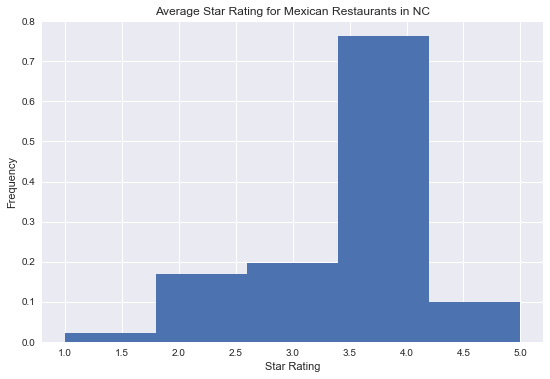

In [41]:
plt.hist(nc_mex['stars'], normed = 1, bins = 5)
plt.title('Average Star Rating for Mexican Restaurants in NC')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')

## Hypothesis test 1: Does Arizona have 'better' Mexican restaurants than North Carolina?

What is your null hypothesis?

- There is no significant difference between Mexican restuarant ratings in NC and AZ

What is your alternative hypothesis?

- Az has significantly higher rated Mexican Restaurants than NC

What statistic are you picking in order to assess the validity of the null hypothesis?

- mean difference

What is the observed value of the statistic?

In [42]:
arizona = np.mean(az_rest_mex['stars'])
nc = np.mean(nc_mex['stars'])
observed_stat = abs(arizona - nc)
print('the observed test statistic is: ' + str(observed_stat))

the observed test statistic is: 0.01709614745507082


In [43]:
#combining the two states into one dataframe 
az_nc = az_rest_mex.append(nc_mex)
az_nc.head()

,Unnamed: 0,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
4,2227,e5kc0CQ4R-PCCDgb274gSg,Phoenix,"455 N 3rd St Ste 114 Phoenix, AZ 85004",33.452154,-112.068620,Canyon Cafe,238,3.5,AZ,...,0,0,0,0,0,0,0,771,47,1
8,2238,neGAQFkBNI8-rpPBLBzNkw,Phoenix,"301 East McDowell Road Phoenix, AZ 85004",33.465440,-112.069090,Taco Bell,10,4.0,AZ,...,0,0,0,0,0,0,0,78,8,0
12,2249,BESmH-lmMm34_EefL8X9fQ,Phoenix,"1830 S Central Ave Phoenix, AZ 85004",33.429424,-112.073929,Comedor Guadalajara,265,4.0,AZ,...,0,0,0,0,0,0,0,808,66,0
13,2253,D09yG6Z3gcsh24Qn7Y4gYA,Phoenix,"530 E McDowell Rd Ste 103 Phoenix, AZ 85004",33.465712,-112.065729,Chico's Tacos,89,3.0,AZ,...,0,0,0,0,0,0,0,197,18,0
18,2260,Y293fHh5SZ0_9BZm4M6BCg,Phoenix,"125 E Adams St Phoenix, AZ 85004",33.449309,-112.071940,Matador Restaurant,57,3.0,AZ,...,0,0,0,0,0,1,0,60,11,0


Run a simulation in order to compute the distribution of the statistic under the null hypothesis. 

Plot a histogram for this statistic.

In [44]:
diffs = np.array([])
for i in np.arange(1, 1000):
    az_nc["shuffled_state"] = np.random.choice(az_nc["state"], len(az_nc["state"]), replace = False)
    az_mean_shuf = np.mean(az_nc[az_nc["shuffled_state"] == "AZ"]["stars"])
    nc_mean_shuf = np.mean(az_nc[az_nc["shuffled_state"] == "NC"]["stars"])
    diff_shuf = abs(az_mean_shuf - nc_mean_shuf)
    diffs = np.append(diffs, diff_shuf)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

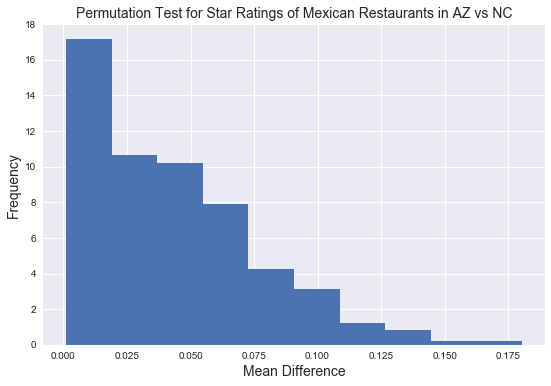

In [45]:
plt.hist(diffs, normed = 1)
plt.title('Permutation Test for Star Ratings of Mexican Restaurants in AZ vs NC', size = 'medium')
plt.xlabel('Mean Difference', size = 'medium')
plt.ylabel('Frequency', size = 'medium')

What is the p value of your observed statistic?

In [46]:
p_value = np.sum(diffs >= observed_stat) / 1000
print('The P-value of the observed test statistic: ' + str(p_value))

The P-value of the observed test statistic: 0.741


- The p value is much greater than 0.05, so the null hypothesis CANNOT be rejected. A lot of factors could explain this. Possibly, North Carolina has large Mexican communities despite its distance from Mexico. Potentially, due to being closer to Mexico, people in Arizona have higher standard for their Mexican food. Or even more generally, maybe the two states have similar ratings for Mexican food because reviews are naturally biased; they always only have strong positives and negatives and not any inbetween values. That is, regardless of where the restaurants are, a state's mean rating for a type of restaurant could be very similar to another state's due to this effect

- We also made a model to see the correlation between the percent of mexican restaurants in a city and the size of the mexican community in a city, In this case, the null hypothesis that the size of the mexican population in a city and the number of mexican restaurants have no correlation can be rejected (p = 0.021)

- We also made a model to see the correlation between the percent of mexican restaurants in a city and the size of the mexican community in a city, In this case, we do not have sufficient evidence to reject the null hypothesis that the size of the mexican population in a city and the number of mexican restaurants have no correlation. (p = 0.138)

In [48]:
import statsmodels.api as sm

In [49]:
X = city_data['Percent Mexican']
y = city_data['Percent Mexican Restaurant']
X = sm.add_constant(X) 

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Percent Mexican Restaurant   R-squared:                       0.409
Model:                                    OLS   Adj. R-squared:                  0.388
Method:                         Least Squares   F-statistic:                     19.38
Date:                        Tue, 18 Dec 2018   Prob (F-statistic):           0.000142
Time:                                13:44:39   Log-Likelihood:                 22.545
No. Observations:                          30   AIC:                            -41.09
Df Residuals:                              28   BIC:                            -38.29
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0562      0.037      1.528      0.138      -0.019       0.132
Percent Mexican     0.5377      0.122      4.402      0.000       0.287       0.788
==============================================================================
Omnibus:                       19.146   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.116
Skew:                           1.494   Prob(JB):                     7.84e-07
Kurtosis:                       6.684   Cond. No.                         6.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hypothesis Test 2: Do people in Arizona review Mexican restaurants more often in Arizona than other people in other states?

After examining our previous hypothesis, we decided to explore whether people in Arizona review Mexican Restaurants in Arizona more than other states, like North Carolina. Maybe they do not have higher ratings, but attract more attention from reviewers 

Our null hypothesis is that restaurants in Arizona attract the same amount of reviewers as those in NC. Our alternative is that restaurants in Arizona attract more reviewers of Mexican Restaurants.

In [50]:
def tvd(dist1, dist2):
    '''computes the total variation distance between two distributions'''
    return 0.5 * sum(np.abs(dist1 - dist2))

In [51]:
def proportions(array):
    '''use this function to turn data that has the number of instances of each category into
    percentages in each category'''
    return array / np.sum(array)

In [52]:
def permutation_test(df, variable, classes, repetitions):
    '''
    variable: column label of the variable whose distribution you are comparing 
    classes: column label of the variable that gives you classes
    repetitions: number of times to do the simulation
    '''
    
    df = df.sort_values(classes)
    df = df.reset_index()
    
    #observed test statistic
    df = df[[variable, classes]]
    
    #get rid of the fill value = 0
    
    #create a pivot table which has the classes along the rows
    #and the continuous variable along the single column
    #recall that pivot_table by default computes the mean of each group
    df_pivot = df.pivot_table(index=classes, values = variable)
    
    #test stat = absolute diff of means
    observed_stat = abs(df_pivot.iloc[0][0] - df_pivot.iloc[1][0])
    
    #simulate under the null hypo 
    meandiffs = []
    df_size = len(df)
    for i in np.arange(repetitions):
        
        #shuffle the dataframe by sampling with replacement
        shuffled_df = df.sample(df_size, replace=False)
        
        #reset the index so that the shuffled order is maintained
    
        shuffled_df = shuffled_df.reset_index()
        
        #create a new temp dataframe with the original classes
        #and the variable values in this shuffled order
        permuted_df = pd.DataFrame({classes : df[classes], variable : shuffled_df[variable]})
        
        #do the same pivoting
        permuted_df_pivot = permuted_df.pivot_table(index=classes, 
                                                    values = variable)
        
        #find the meandiff
        current_meandiff = abs(permuted_df_pivot.iloc[0][0] 
                               - permuted_df_pivot.iloc[1][0])
        meandiffs.append(current_meandiff)
        
    meandiffs = np.array(meandiffs)
    plt.hist(meandiffs, ec = 'black', normed = 1)
    plt.scatter(observed_stat, 0, s=30, color='r')
    
    #we can also compute a p-value
    #the direction of the alternative hypothesis the right side. 
    #The alternative is saying that we are assuming different populations
    #so there will be a difference in means
    
    p_value = np.sum(meandiffs >= observed_stat) / repetitions
    
    print("The p value is " + str(p_value))
    
    return(meandiffs, observed_stat)

In [53]:
az_nc_new = az_nc.reset_index()

In [55]:
az_nc_new.head()

,index,Unnamed: 0,business_id,city,full_address,latitude,longitude,name,review_count,stars,...,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes,shuffled_state
0,4,2227,e5kc0CQ4R-PCCDgb274gSg,Phoenix,"455 N 3rd St Ste 114 Phoenix, AZ 85004",33.452154,-112.068620,Canyon Cafe,238,3.5,...,0,0,0,0,0,0,771,47,1,AZ
1,8,2238,neGAQFkBNI8-rpPBLBzNkw,Phoenix,"301 East McDowell Road Phoenix, AZ 85004",33.465440,-112.069090,Taco Bell,10,4.0,...,0,0,0,0,0,0,78,8,0,AZ
2,12,2249,BESmH-lmMm34_EefL8X9fQ,Phoenix,"1830 S Central Ave Phoenix, AZ 85004",33.429424,-112.073929,Comedor Guadalajara,265,4.0,...,0,0,0,0,0,0,808,66,0,AZ
3,13,2253,D09yG6Z3gcsh24Qn7Y4gYA,Phoenix,"530 E McDowell Rd Ste 103 Phoenix, AZ 85004",33.465712,-112.065729,Chico's Tacos,89,3.0,...,0,0,0,0,0,0,197,18,0,NC
4,18,2260,Y293fHh5SZ0_9BZm4M6BCg,Phoenix,"125 E Adams St Phoenix, AZ 85004",33.449309,-112.071940,Matador Restaurant,57,3.0,...,0,0,0,0,1,0,60,11,0,NC


The p value is 0.104


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


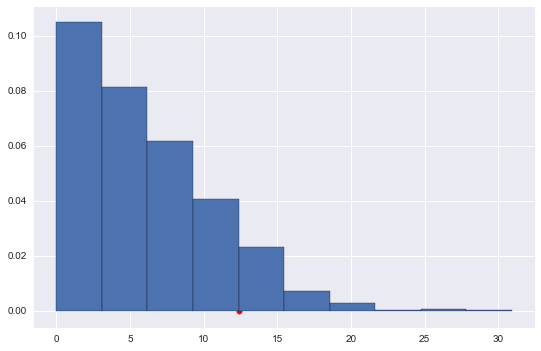

In [56]:
_ = permutation_test(az_nc_new, 'review_count', 'state', 1000)

The p-value is 0.104, which is not less than 0.05. We do not have enough evidence to reject the null hypothesis; restaurants in Arizona don't seem to attract a more significant number of reviewers for Mexican restaurants.

## Hypothesis Test 3: Do Mexican restaurants  have higher star ratings than other types of restaurants in Arizona?

Considering the higher Mexican demographic in Arizona and number of restaurants, there may be higher Mexican restaurant ratings than other types of restaurants in AZ.


Hypothesis: Mexican restaurants in Arizona have different ratings than other restaurants in Arizona.

Null Hypothesis: There is no difference.

In [57]:
# Writing a function to determine if a restaurant is mexican or not. 

In [58]:
def isMexican(restaurant):
    if restaurant == 1:
        return 'Mexican'
    else:
        return 'Not Mex'

In [59]:
az_rest['Mexican-ness'] = az_rest['Mexican'].apply(isMexican)

In [60]:
az_rest[['Mexican-ness']].head()

,Mexican-ness
0,Not Mex
1,Not Mex
2,Not Mex
3,Not Mex
4,Mexican


The p value is 0.013


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


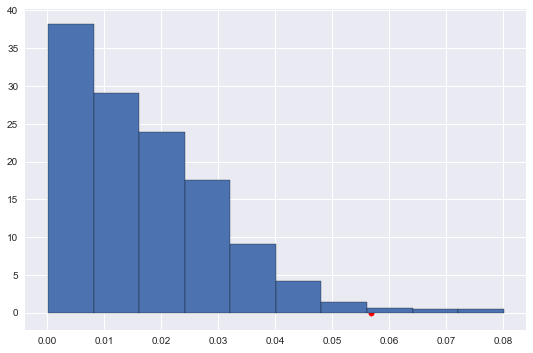

In [61]:
_ = permutation_test(az_rest, 'stars', 'Mexican-ness', 1000)

-  The P-value is 0.013, so in comparison to an alpha value of 0.05, we have enough evidence to reject the null. There is a difference in star ratings between Mexican restaurants and all other types of restaurants in Arizona.